In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-classification-dataset/Diabetes Classification.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
sns.set()

In [3]:
df = pd.read_csv('/kaggle/input/diabetes-classification-dataset/Diabetes Classification.csv')

In [4]:
df.head(10)

,Unnamed: 0,Age,Gender,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis
0,0,50,F,24,4.2,0.9,2.4,1.4,46.0,4.7,0
1,1,26,M,23,3.7,1.4,1.1,2.1,62.0,4.5,0
2,2,33,M,21,4.9,1.0,0.8,2.0,46.0,7.1,0
3,3,45,F,21,2.9,1.0,1.0,1.5,24.0,2.3,0
4,4,50,F,24,3.6,1.3,0.9,2.1,50.0,2.0,0
5,5,48,M,24,2.9,0.8,0.9,1.6,47.0,4.7,0
6,6,43,M,21,3.8,0.9,2.4,3.7,67.0,2.6,0
7,7,32,F,24,3.8,2.0,2.4,3.8,28.0,3.6,0
8,8,31,F,23,3.6,0.7,1.7,1.6,55.0,4.4,0
9,9,33,F,21,4.0,1.1,0.9,2.7,53.0,3.3,0


In [5]:
df.tail(10)

,Unnamed: 0,Age,Gender,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis
5122,5122,86,M,21,5.30,0.80,1.410000,3.020000,101.0,7.74,1
5123,5123,60,M,27,5.64,3.80,4.860753,4.860753,71.3,6.50,1
5124,5124,59,M,24,4.65,1.70,1.010000,2.670000,69.9,6.50,1
5125,5125,77,M,22,4.02,1.28,1.230000,2.250000,60.6,4.34,1
5126,5126,31,M,25,4.00,2.00,4.860753,4.860753,88.0,5.00,1
5127,5127,54,M,23,5.00,1.50,1.240000,2.980000,77.0,3.50,1
5128,5128,50,F,22,4.37,2.09,1.370000,2.290000,47.3,4.40,1
5129,5129,67,M,24,3.89,1.38,1.140000,2.170000,70.6,4.73,1
5130,5130,60,F,29,5.91,1.29,1.730000,2.850000,50.2,7.33,1
5131,5131,37,M,34,5.42,2.66,1.080000,2.870000,75.5,4.61,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5132 entries, 0 to 5131
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5132 non-null   int64  
 1   Age         5132 non-null   int64  
 2   Gender      5132 non-null   object 
 3   BMI         5132 non-null   int64  
 4   Chol        5132 non-null   float64
 5   TG          5132 non-null   float64
 6   HDL         5132 non-null   float64
 7   LDL         5132 non-null   float64
 8   Cr          5132 non-null   float64
 9   BUN         5132 non-null   float64
 10  Diagnosis   5132 non-null   int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 441.2+ KB


Data Cleaning

In [7]:
# Drop the 'Unnamed: 0' column
df.drop(['Unnamed: 0'], axis=1, inplace=True)

# Display the first few rows of the cleaned dataframe
df.head()

,Age,Gender,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis
0,50,F,24,4.2,0.9,2.4,1.4,46.0,4.7,0
1,26,M,23,3.7,1.4,1.1,2.1,62.0,4.5,0
2,33,M,21,4.9,1.0,0.8,2.0,46.0,7.1,0
3,45,F,21,2.9,1.0,1.0,1.5,24.0,2.3,0
4,50,F,24,3.6,1.3,0.9,2.1,50.0,2.0,0


In [9]:
df.describe(include='all')

,Age,Gender,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis
count,5132.000000,5132,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000
unique,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,3256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,48.950312,NaN,24.613406,4.866882,1.719328,1.593305,2.914121,71.144800,4.896969,0.388348
std,14.048794,NaN,4.277205,1.001052,1.327057,1.038849,0.945423,28.494394,1.689206,0.487422
min,20.000000,NaN,15.000000,0.000000,0.000000,0.000000,0.300000,4.860753,0.500000,0.000000
25%,36.000000,NaN,22.000000,4.190000,0.910000,1.090000,2.290000,58.000000,3.900000,0.000000
50%,49.000000,NaN,24.000000,4.800000,1.380000,1.300000,2.790000,70.200000,4.720000,0.000000
75%,59.000000,NaN,27.000000,5.460000,2.100000,1.590000,3.400000,81.600000,5.600000,1.000000


Value counts for 'Gender' and 'Diagnosis'

In [10]:
print(df['Gender'].value_counts())

Gender
M    3256
F    1875
f       1
Name: count, dtype: int64


In [11]:
print(df['Diagnosis'].value_counts())

Diagnosis
0    3139
1    1993
Name: count, dtype: int64


In [12]:
# Correcting 'Gender' column
df['Gender'] = df['Gender'].str.upper()

# Confirm the correction
df['Gender'].value_counts()

Gender
M    3256
F    1876
Name: count, dtype: int64

Plotting a countplot for 'Diagnosis' stratified by 'Gender'

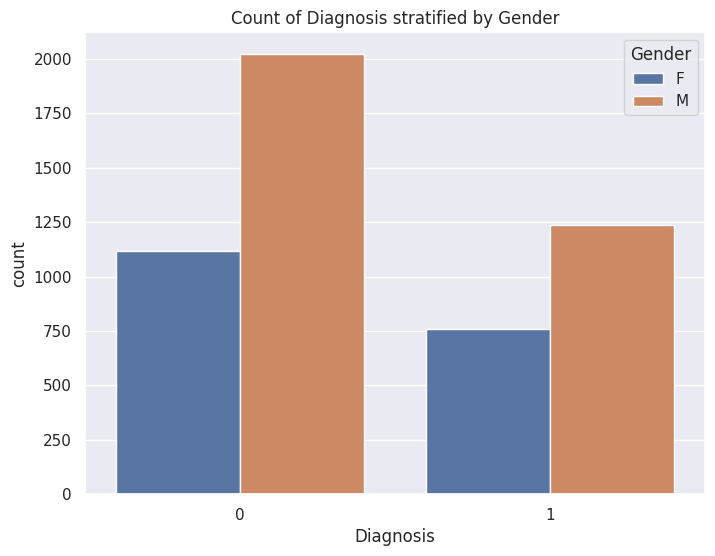

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Diagnosis', hue='Gender', data=df)
plt.title('Count of Diagnosis stratified by Gender')
plt.show()

Convert the categorical 'Gender' column into numeric for further data analysis and machine learning, using 'get_dummies' from pandas. This process is known as one-hot encoding.

In [14]:
# Convert the 'Gender' column into numeric
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

In [15]:
df.head()

,Age,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis,Gender_M
0,50,24,4.2,0.9,2.4,1.4,46.0,4.7,0,False
1,26,23,3.7,1.4,1.1,2.1,62.0,4.5,0,True
2,33,21,4.9,1.0,0.8,2.0,46.0,7.1,0,True
3,45,21,2.9,1.0,1.0,1.5,24.0,2.3,0,False
4,50,24,3.6,1.3,0.9,2.1,50.0,2.0,0,False


This pre-processing is essential before training most of the machine learning models.

In [16]:
# Defining features (X) and target (y)
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (mean=0, std_dev=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Train a simple logistic regression model on this data and evaluate its performance

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Instantiate a LogisticRegression model
log_reg_model = LogisticRegression(random_state=42)

# Fit the model on the scaled training data
log_reg_model.fit(X_train_scaled, y_train)

# Use the trained model to make predictions on the test data
y_test_pred = log_reg_model.predict(X_test_scaled)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

accuracy, precision, recall, f1

(0.8023369036027264,
 0.7972972972972973,
 0.6973995271867612,
 0.7440100882723834)

these metrics mean:
- Accuracy is the proportion of the total number of predictions that are correct.
- Precision is the proportion of positive predictions that are actually correct.
- Recall is the proportion of actual positives that were identified correctly.
- The F1-score is a combination of precision and recall in a way that brings both of them into account.

K-Fold Cross validation for our Logistic Regression model.

In [19]:
from sklearn.model_selection import cross_val_score

# Perform 10-fold cross validation
scores = cross_val_score(log_reg_model, X_train_scaled, y_train, cv=10)
mean_cv_score = scores.mean()

mean_cv_score

0.81729808319981

The mean accuracy score from a 10-fold cross-validation on the training set is approximately 0.817. This score is a better estimate of the logistic regression model's ability to generalize to unseen data compared to the train-test split method

Generating and visualizing a learning curve for our model - ROC AUC

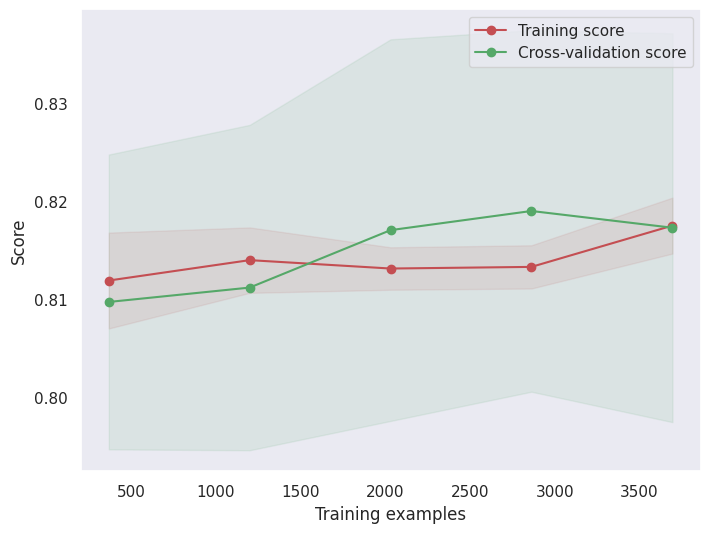

In [20]:
from sklearn.model_selection import learning_curve

# Compute train_sizes and train_scores
train_sizes, train_scores, test_scores = learning_curve(log_reg_model, X_train_scaled, y_train, cv=10)

# Compute mean and standard deviation of train_scores and test_scores along the axis=1
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Learning curve plot
plt.figure(figsize=(8, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
plt.show()

Perform hyperparameter tuning - Grid Search

In [21]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid for 'C'
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Configure GridSearchCV
grid_search = GridSearchCV(log_reg_model, param_grid, cv=10, return_train_score=True)

# Fit grid_search on the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Get the optimal hyperparameters
grid_search.best_params_, grid_search.best_score_

({'C': 0.1}, 0.8182719126461337)

The chosen hyperparameter 'C' for the logistic regression model is 0.1. This 'C' value has led to the best mean cross-validated score of approximately 0.818.